# Quantum Half Adder

## Classical version

1 XOR gate + 1 AND gate

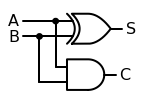

In [17]:
import SchemDraw as schemdraw
import SchemDraw.logic as logic
d = schemdraw.Drawing(unit=.5)
S = d.add(logic.XOR2, rgtlabel='$S$')
A = d.add(logic.DOT, xy=S.in1)
d.add(logic.LINE, d='left', l=d.unit*2, lftlabel='$A$')
d.add(logic.LINE, d='left', xy=S.in2)
B = d.add(logic.DOT)
d.add(logic.LINE, d='left', lftlabel='$B$')

d.add(logic.LINE, d='down', xy=A.start, l=d.unit*3)
C = d.add(logic.AND2, d='right', anchor='in1', rgtlabel='$C$')
d.add(logic.LINE, d='down', xy=B.start, toy=C.in2)
d.add(logic.LINE, to=C.in2)
d.draw()

## Quantum Version

XOR = 2 CX gates
AND = 1 CCX gate

In [21]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

def build_curcuit(input1, input2):

    qc = QuantumCircuit(
        QuantumRegister(1, name="input1"),
        QuantumRegister(1, name="input2"),
        QuantumRegister(1, name="xor"),
        QuantumRegister(1, name="and"),
        ClassicalRegister(1, name="sum"),
        ClassicalRegister(1, name="carry")
    )

    # init values, default 1+1
    if input1:
        qc.x(0)
    if input2:
        qc.x(1)
    qc.barrier()

    # xor gate
    qc.cx(0,2)
    qc.cx(1,2)
    qc.barrier()

    # and gate
    qc.ccx(0,1,3)
    qc.barrier()

    # measure
    qc.measure([2,3], [0,1])
    return qc

In [22]:
# Draw circuit
qc = build_curcuit(0, 0)
qc.draw()

░            ░       ░       
input1_0: ─░───■────────░───■───░───────
           ░   │        ░   │   ░       
input2_0: ─░───┼────■───░───■───░───────
           ░ ┌─┴─┐┌─┴─┐ ░   │   ░ ┌─┐   
   xor_0: ─░─┤ X ├┤ X ├─░───┼───░─┤M├───
           ░ └───┘└───┘ ░ ┌─┴─┐ ░ └╥┘┌─┐
   and_0: ─░────────────░─┤ X ├─░──╫─┤M├
           ░            ░ └───┘ ░  ║ └╥┘
   sum_0: ═════════════════════════╩══╬═
                                      ║ 
 carry_0: ════════════════════════════╩═

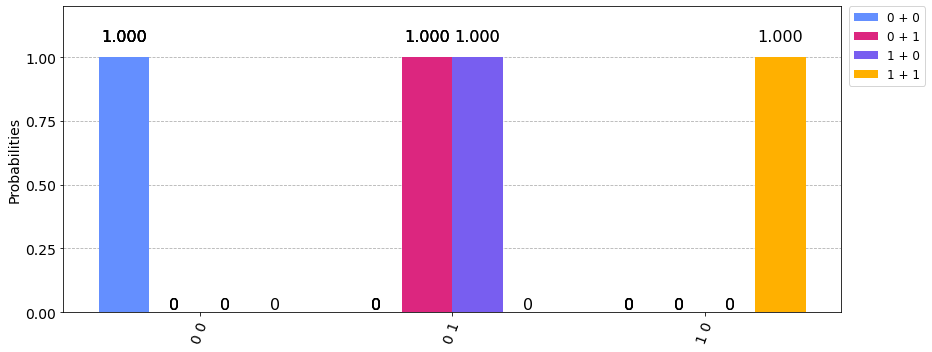

In [39]:
from qiskit import execute, Aer
from qiskit.visualization import plot_histogram
from itertools import product
# Execute experiment

backend = Aer.get_backend('qasm_simulator')

legend = []
counts = []
for input1, input2 in product(range(2), range(2)):
    name = f"{input1} + {input2}"
    legend.append(name)
    qc = build_curcuit(input1, input2)
    result = execute(qc, backend).result()
    counts.append(result.get_counts())

plot_histogram(counts, legend=legend, figsize=(12, 5))